In [5]:
import numpy as np
import matplotlib.pyplot as plt
import math 
import seaborn as sns 
import warnings
from scipy import stats
from PIL import Image

rc = {
    "axes.facecolor": "#F6F6F6",
    "figure.facecolor": "#F6F6F6",
    "axes.edgecolor": "#000000",
    "grid.color": "#EBEBE7",
    "font.family": "malgun gothic",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 1
}

plt.rc('axes', unicode_minus=False)
sns.set(rc=rc)
warnings.filterwarnings(action = 'ignore')

# **감마분포**

감마 분포를 이해 하기 위해서는 포아송 과정을 먼저 이해해 볼 필요가 있다.

감마 분포의 특정 형태는 지수 분포와 매우 연관이 깊기 때문이다. 

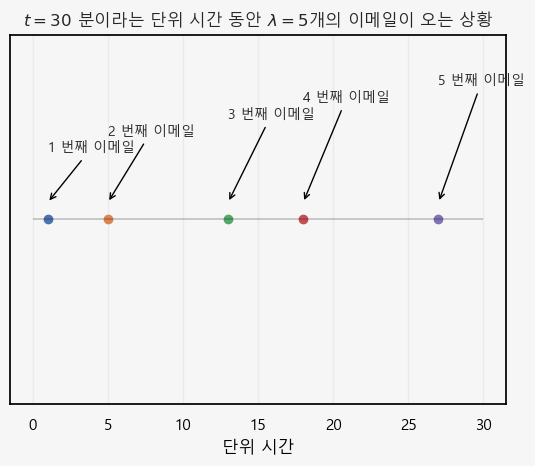

In [166]:
fig,ax = plt.subplots()

ax.plot([0,30],[10,10], c = 'k', lw = 0.3)

num = 1

for _ in range(5):
    
    ax.scatter(num,10)
    ax.annotate(f'{_ + 1} 번째 이메일', xy  = (num, 10.05) ,xytext = (num, 10.2 + _ / 20), size = 10,
                arrowprops = {'arrowstyle':'->', 'color':'black'})
    
    num += np.random.poisson(lam = 5)
    
    
ax.set_yticks([])
ax.set_xlabel('단위 시간')

ax.set_title('$t = 30$ 분이라는 단위 시간 동안 $\lambda = 5$개의 이메일이 오는 상황');

30 분이라는 단위 시간 동안 평균적으로 이메일이 5 개 올 때 

30분이라는 단위 시간 동안 이메일이 온 개수를 Nt 라고 뒀을 때 

단위 시간을 $t$ , 평균적으로 이메일이 오는 개수를 $t\lambda$로 두면

$N_t$ = $Pois$($t\lambda$) 를 따른다고 볼 수 있다.

각 i 번째 이메일이 올 때 마다의 사건을

$T_i$ 로 두면 

$T_{i-1}$ 부터 $T_i$ 번째 이메일이 올 때 까지 걸리는 시간은

$Expo ~ (\lambda)$를 따르는 것을 알 수 있다.

지수 분포의 정의를 잘 생각해보면 지수 분포란 단위 기간 동안 $\lambda$개의 사건이 발생 할 때 첫번째 사건이 일어날 때 까지 걸리는 시간이기 때문이다.

또한 지수 분포의 무기억성 성질 때문에 $T_{i-1}$ 부터 $T_i$ 까지 걸리는 시간과 $T_i$ 부터 $T_{i+1}$ 까지 걸리는 시간은 모두 독립적으로 $Expo$ ~ $(\lambda)$를 따른다

그렇다면 지수 분포는 첫 번째 사건이 발생 하기 까지 걸린 시간을 의미 했다.

그럼 만약 n 번째 사건이 발생 하기 까지의 걸린 시간을 알고 싶다면 ? 

여태 까지 기다린 시간들을 모두 더하면 될 것이다.

$W_i$ ~ $Expo(\lambda)$

$W_n$ : n 번째 사건이 발생하기 까지 걸린 시간

$W_n$ = $\sum _{i = 0}^{n-1}W_i$


이 때 ! $W_n$ 은 $Gamma (n,\lambda)$ 를 따른다.

이래서 감마 분포는 지수 분포와 연관이 깊다.

우리는 감마 분포가 어떻게 생긴지는 몰라도 감마 분포가 의미하는 것이 무엇인지는 감을 잡았다.

# **감마 함수**

감마 분포를 이해 하기 먼저 감마 함수를 먼저 이해하고, 감마 분포를 구해보고 감마 분포와 $W_n$ = $\sum _{i = 0}^{n-1}W_i$ 가 같은 분포인지를 확인해보자

$\gamma(\alpha)$ = $\int_0^{\infty} x ^{\alpha - 1} e^{-x} dx$ [$\alpha > 0$] 를 따르는 함수이다.

감마 함수의 대표적 성질은 다음과 같다

1. $\gamma(\alpha) = (\alpha - 1)\gamma(\alpha - 1)$
2. 위와 같은 성질로 $\gamma(\alpha + 1) = \alpha\gamma(\alpha)$
3. 1,2 번의 성질로 인해 $\gamma (n)$ = $(n-1)!$
4. 극 좌표계 변환을 통해 $\gamma(\frac{1}{2})$ = $\sqrt(\pi)$

증명 과정은 첨부 링크를 달도록 하겠다.

https://gaussian37.github.io/math-pb-gamma_and_exponential_distribution/

감마 분포는 위의 감마 함수에서 두 개의 파라미터 $\alpha$,$\beta$ 를 갖는 분포이다

# **감마 분포**

$gamma (\alpha, \beta )$ = $C$ * $\int_0^{\infty} x ^{\alpha - 1} e^{-x} dx$ [$\alpha > 0$], [C : 정규화 상수]

인데 적분을 풀어보면 적분 값은 공식에 따라 $\gamma (\alpha)$ 가 나옴을 알 수 있다.

그러니 정규화 상수의 값은 $\frac{1}{\gamma(\alpha)}$ 이다. 

적합한 PDF 라면 누적 분포 값이 1이 나와야 하기 때문에 정규화 상수 값이 다음과 같은 값을 갖게 되는 것이다.

$gamma (\alpha, \beta )$ = $\frac{1}{\gamma (\alpha)}$ * $\int_0^{\infty} x ^{\alpha - 1} e^{-x} dx$

$\beta$ 는 어디에 위치하냐면

$x = \frac{t}{\beta}$ 라고 두게 되면 

$dx = \frac{1}{\beta} dt$

를 대입해보자

$gamma (\alpha, \beta )$ = $\frac{1}{\gamma(\alpha)}$ * $\int_0^{\infty} (\frac{t}{\beta})^{\alpha - 1} * e^{- \frac{t}{\beta}} * \frac{1}{\beta} dt$

= $\frac{1}{\gamma(\alpha)}$ * $\int_0^{\infty} \frac{1}{\beta}^{\alpha - 1} * t ^{\alpha - 1} * e^{-\frac{t}{\beta}} * \frac{1}{\beta}dt$

= = $\frac{1}{\gamma(\alpha)}$ * $\int_0^{\infty} \frac{1}{\beta}^{\alpha} * t ^{\alpha - 1} * e^{-\frac{t}{\beta}}dt$

= $\frac{1}{\gamma(\alpha) * \beta ^ \alpha}$ $\int_0^{\infty} t ^{\alpha - 1} * e^{-\frac{t}{\beta}}dt$

짜잔 이렇게 베타 분포의 확률 밀도 함수를 구했다. 

이 때 $\alpha = n , \beta = \lambda $ 일 때가 단위 시간에 평균 적으로 $\lambda$ 번 사건이 일어날 때 n 개 까지의 사건이 걸리기 까지 걸리는 시간의 분포 된다.

만약 $\alpha = 1$ 이 라면 1개까지의 사건이 걸리기 까지의 시간이 되니, alpha 가 1일 때는 지수 분포와 같다

두 분포가 같은지 확인 하기 위한 방법은 예전에 배웠던

**MGF (적률생성함수)** 가 같은지를 확인 하면 된다.

# **MGF 비교를 통한 증명**

일반화를 시키기 위해 $\lambda  = 1$ 일 때의 MGF 를 구해보겠다.

$\lambda = 1$ 일 때의 확률 변수를 X 로 두고 $\lambda = \lambda$ 일 때의 확률 변수를 Z 로 둔다면

$Z = \frac{X}{\lambda}$ 로 두고 일반화 시키면 되니 $\lambda  = 1$ 일 때로 구해보자



N 개의 사건까지 걸리는 시간의 분포 $W_n$ 는 $W_n$ = $\sum _{i = 0}^{n-1}W_i$ 였으니 $W_n$의 MGF는 $W_i$ 들의 MGF 의 곱이다.

총 n 개의 $W_i$ 들이 있고, $W_i$ 의 MGF 는 $\frac{1}{1- t}$ 이니 

$MGF$ $of$ $W_n$ = $(\frac{1}{1-t})^n$ 이다.

감마 분포의 MGF 는 손으로 적은 이미지를 첨부하겠다.

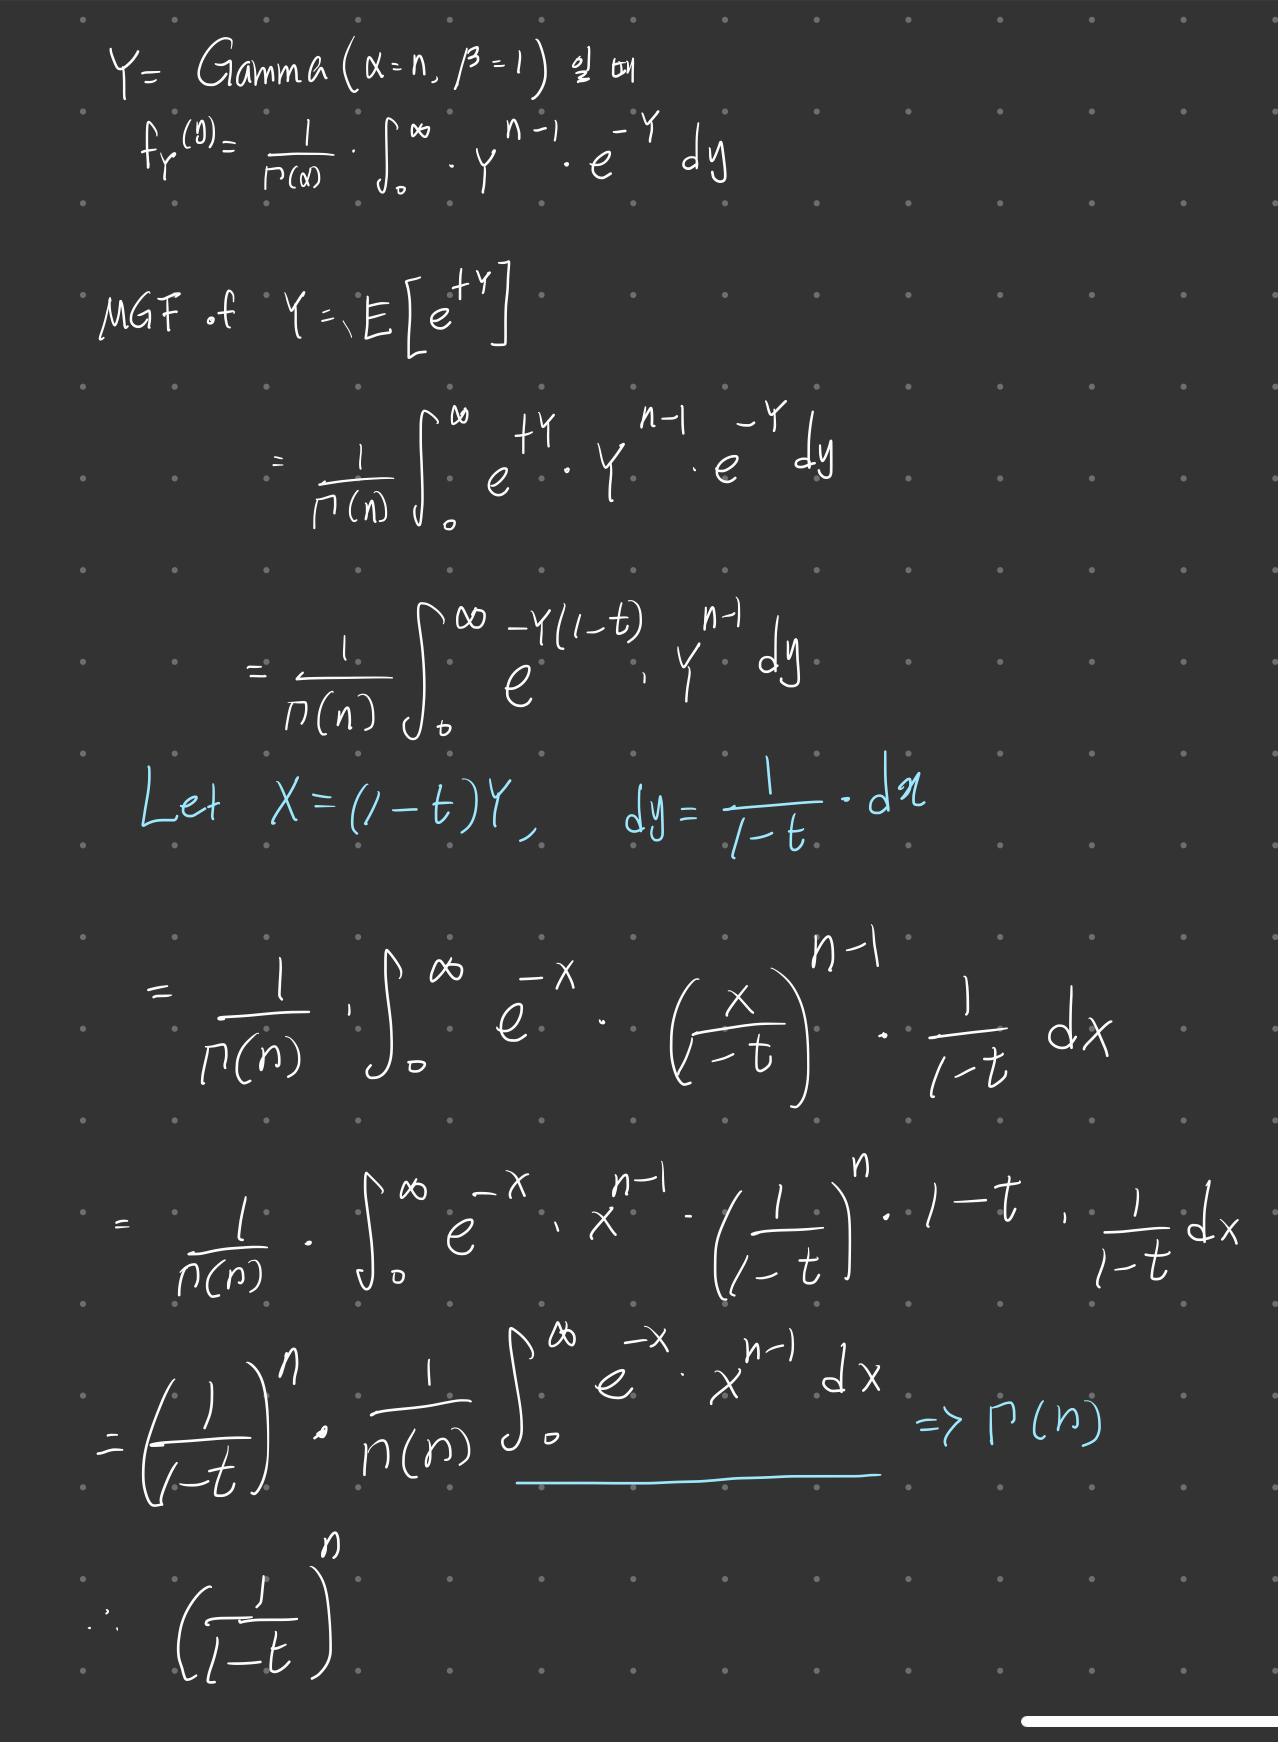

In [168]:
Image.open("C:/Users/whileduck/Desktop/MGF.jpg")

$W_n$ 의 MGF 와 $Gamma(N, 1)$ 의 MGF 일치하는 것으로 두 분포는 같은 분포임이 증명되었다.

# **감마 분포의 평균과 분산**

MGF 로 구해봐도 되지만 LOTUS 로 구하는 것이 훨씬 편하다.

$X$ ~ $\gamma(\alpha, \beta = 1)$ X 는 beta 값이 1인 감마 분포이다. 

X 의 n 차 적률을 구해보자

$E[X^n]$ = $\frac{1}{\gamma(\alpha)} \int_0^{\infty} X^n * X^{\alpha - 1} * e^{-x}dx $

= $\frac{1}{\gamma(\alpha)} \int_0^{\infty} X^{n + \alpha - 1} * e^{-x}dx $

[n + a 를 하나의 값인 본다면]

= $\frac{\gamma(\alpha + n)}{\gamma(\alpha)}$

----

1 차 적률

n = 1 

$\frac{\gamma(\alpha + 1)}{\gamma(\alpha)}$ = $\frac{\alpha * \gamma(\alpha)}{\gamma(\alpha)} = \alpha$ 

2 차 적률

n = 2

$\frac{\gamma(\alpha + 2)}{\gamma(\alpha)}$ = $\frac{(\alpha + 1) \gamma(\alpha + 1)}{\gamma(\alpha)}$ = $\frac{(\alpha + 1)\alpha  \gamma(\alpha)}{\gamma(\alpha)}$ = $\alpha ^2 + \alpha $

E[X] = $\alpha$


Var[Y] = $\alpha$

현재 구한 통계량은 $\beta$ 가 1일 때이다. 

일반화를 위해 $\beta$ 가 $\lambda$ 일 때를 구해보자

$Y$ ~ $\gamma(\alpha, \lambda)$ 라면 

$Y = \frac{X}{\lambda}$

$E[Y] = \frac{E[X]}{\lambda} = \frac{\alpha}{\lambda}$


$Var[Y] = \frac{Var[X]}{\lambda^2} = \frac{\alpha}{\lambda^2}$

# **감마 분포의 그래프**

감마 분포에서 두 모수인 $\alpha, \beta$ 는 각 형상 매개변수, 척도 매개변수라고 불린다.

$\alpha$ 값은 감마 분포의 모양을 결정한다. alpha 값이 1보다 작으면 오른쪽으로 긴 꼬리가 있게 되며 , alpha 값이 증가하면 증가 할 수록 분포가 더 대칭적이고 종 모양이 된다.

$\beta$ 값은 척도 매게 변수로, $\beta$ 값이 작으면 작을 수록 더 넓은 범위로 이어지고, $\beta$ 값이 클 수록 분포가 평균 주변에 더 집중된다.

Text(0.5, 1.0, '베타 값에 따른 감마 분포 변화')

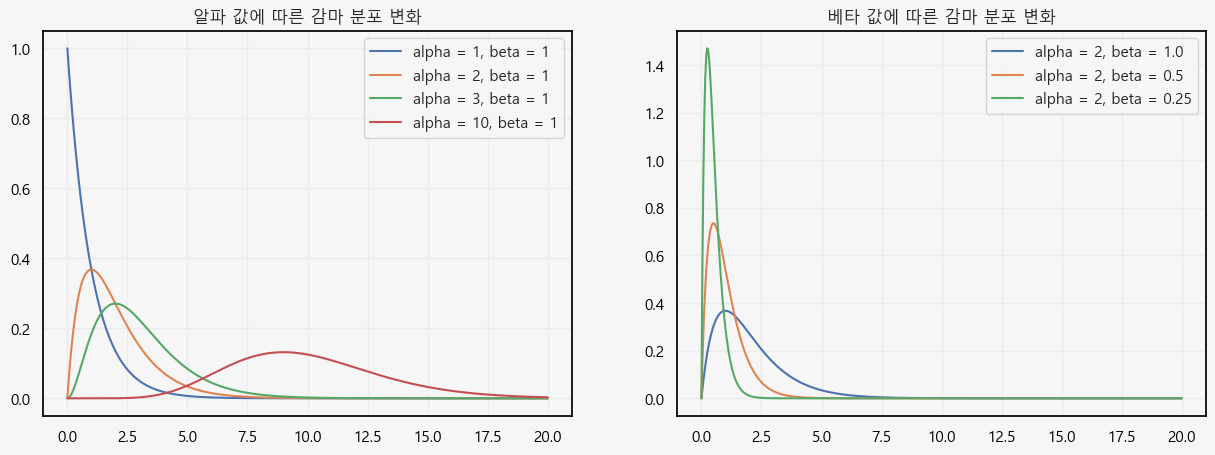

In [55]:
fig,ax = plt.subplots(ncols = 2, figsize = (15,5))

alphas = [1,2,3,10]
betas = [1,2,4]

X = np.linspace(0,20,500)

for a in alphas:
    
    pdf = stats.gamma.pdf(X, a, scale = 1) # beta 는 1로 고정
    ax[0].plot(X,pdf, label = f'alpha = {a}, beta = 1')
    

for b in betas:
    
    pdf = stats.gamma.pdf(X, 2, scale = 1/b) # beta 는 1로 고정
    ax[1].plot(X,pdf, label = f'alpha = 2, beta = {1/b}')
    
    
ax[0].legend()
ax[0].set_title('알파 값에 따른 감마 분포 변화')
ax[1].legend()
ax[1].set_title('베타 값에 따른 감마 분포 변화')